In [1]:
# coding: utf-8
from decimal import Decimal
from enum import Enum
from typing import Dict, List, Union

import matplotlib.pyplot as plt
from numpy import float64
from pandas import DataFrame


Numeric = Union[Decimal, int, float, float64]

In [2]:
class Ticker(Enum):
    APPLE: str = 'AAPL'
    MICROSOFT: str = 'MSFT'
    NETES: str = 'NTES'
    GOOGLE: str = 'GOOG'
    AMAZON: str = 'AMZN'
    FACEBOOK: str = 'FB'


# Ticker enum to the ticker value
TICKERS: Dict[Ticker, str] = {
    Ticker.APPLE: 'AAPL',
    Ticker.MICROSOFT: 'MSFT',
    Ticker.NETES: 'NTES',
    Ticker.GOOGLE: 'GOOG',
    Ticker.AMAZON: 'AMZN',
    Ticker.FACEBOOK: 'FB',
}

In [3]:
# coding: utf-8
from typing import Dict, List

from pandas import DataFrame
import yfinance as yf



class YFinanceFinancialPuller:

    def _clean_daily_dataframe(self, dataframe: DataFrame) -> DataFrame:
        dataframe = dataframe.rename_axis('date')
        dataframe.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
        dataframe.dropna(axis=0, how='any', inplace=True)
        return dataframe

    def get_daily_for_ticker(self, ticker: Ticker) -> DataFrame:
        """ Gets historical data from the corresponding ticker
        
        Args:
            ticker (Ticker): Ticker of the company to retrieve historical data from
        
        Returns
            Dataframe for the corresponding Ticker with the following index and columns
            index: 'date'
            columns: ['open', 'high', 'low', 'close', 'adj_close', 'volume']
        """
        ticker_value = TICKERS.get(ticker)

        data = DataFrame()
        if ticker_value is not None:
            data = yf.download(tickers=ticker_value, period='max')

        data = self._clean_daily_dataframe(data)

        return data.rename_axis()

    def get_daily_for_tickers(self, tickers: List[Ticker]) -> Dict[Ticker, DataFrame]:
        """ Gets historical data from the corresponding tickers
        
        Args:
            tickers (List[Ticker]): List of tickers for the companies to retrieve historical data
        
        Returns
            Dictionary of dataframes for the corresponding Tickers with the following index and columns
            index: 'date'
            columns: ['open', 'high', 'low', 'close', 'adj_close', 'volume']
        """
        data = {}

        for ticker in tickers:
            ticker_value = TICKERS.get(ticker)
            if ticker_value is not None:
                dataframe = yf.download(tickers=ticker_value, period='max')
                data[ticker] = self._clean_daily_dataframe(dataframe)

        return data


In [4]:
puller = YFinanceFinancialPuller()

In [5]:
tickers = [Ticker.APPLE, Ticker.MICROSOFT, Ticker.NETES, Ticker.GOOGLE, Ticker.AMAZON]
finance_data = puller.get_daily_for_tickers(tickers=tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
data = DataFrame({
    TICKERS[Ticker.APPLE]: finance_data[Ticker.APPLE]['close'],
    TICKERS[Ticker.MICROSOFT]: finance_data[Ticker.MICROSOFT]['close'],
    TICKERS[Ticker.NETES]: finance_data[Ticker.NETES]['close'],
    TICKERS[Ticker.GOOGLE]: finance_data[Ticker.GOOGLE]['close'],
    TICKERS[Ticker.AMAZON]: finance_data[Ticker.AMAZON]['close'],
})

data.dropna(axis=0, how='any', inplace=True)

<AxesSubplot: xlabel='date'>

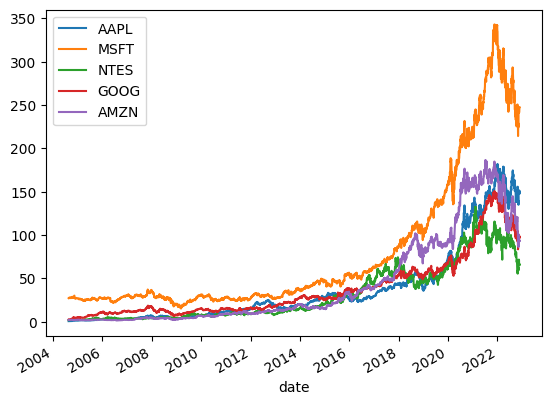

In [7]:

data.plot()

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>], dtype=object)

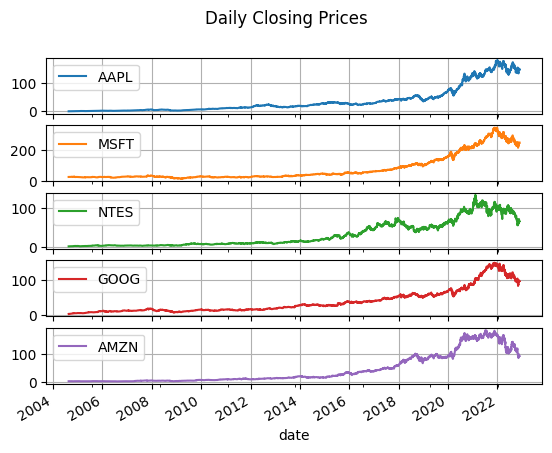

In [8]:
data.plot(subplots=True, title='Daily Closing Prices', grid=True)

array([<AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>, <AxesSubplot: xlabel='date'>,
       <AxesSubplot: xlabel='date'>], dtype=object)

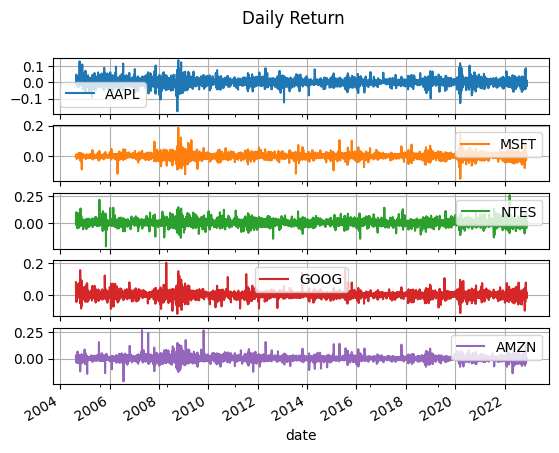

In [9]:
# Looking at daily_returns

daily_return = data.pct_change()

daily_return.plot(subplots=True, title='Daily Return', grid=True)

<AxesSubplot: title={'center': 'Cumulative Product from 1$ Investment in last 5 Years'}, xlabel='date'>

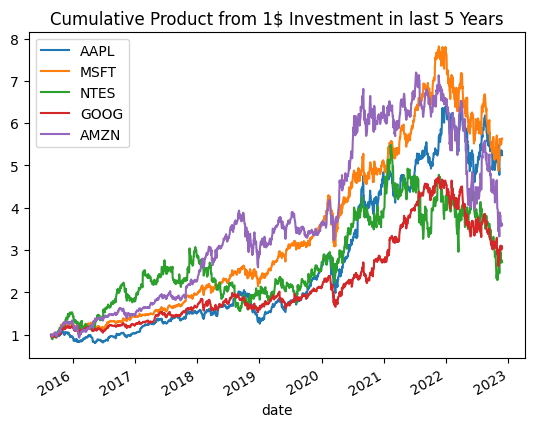

In [10]:
# Looking at the cumulative product from the past 5 years starting at 1$ investment
number_of_years = 5
cumprod_5_years = (1 + daily_return)[-365*number_of_years:].cumprod()

cumprod_5_years.plot(title='Cumulative Product from 1$ Investment in last 5 Years')

<BarContainer object of 5 artists>

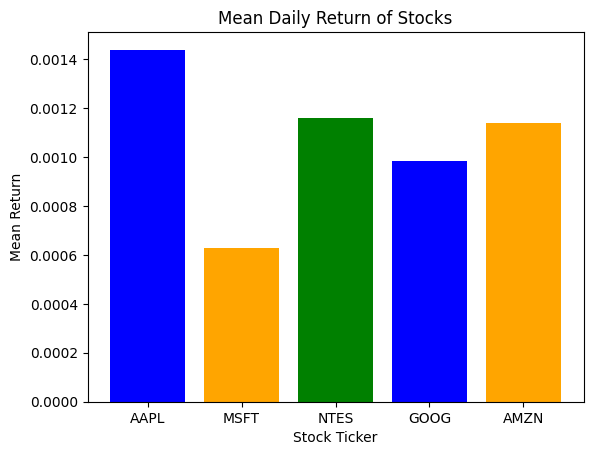

In [11]:
# Look at the mean and std dev of each ticker
fig, ax = plt.subplots()
ax.set(title='Mean Daily Return of Stocks', xlabel='Stock Ticker', ylabel='Mean Return')
plt.bar(x=daily_return.columns, height=daily_return.mean(), color=['blue', 'orange', 'green'])
